# Task 1


# I201861 Shaheer Abdullah Makavi

In [104]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Load and Preprocess the Data

In [4]:
#Reading the csv file
df=pd.read_csv('hmnist_28_28_RGB.csv')

In [5]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [6]:
df.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [8]:
# Are there any missing values?
df.isna().sum()

pixel0000    0
pixel0001    0
pixel0002    0
pixel0003    0
pixel0004    0
            ..
pixel2348    0
pixel2349    0
pixel2350    0
pixel2351    0
label        0
Length: 2353, dtype: int64

In [9]:
print(f"Total No. of Samples: {len(df)}")

Total No. of Samples: 10015


In [10]:
df["label"].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

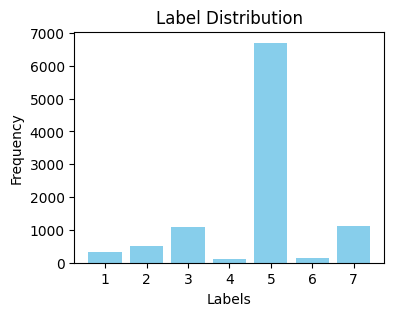

In [52]:
labels = [5, 7, 3, 2, 1, 6, 4]
frequencies = [6705, 1113, 1099, 514, 327, 142, 115]

# Create a bar chart
plt.figure(figsize=(4, 3))
plt.bar(labels, frequencies, color='skyblue')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(labels)  # Set the x-axis ticks to the labels
plt.show()

You can See that the Label 5 has the highest number of labels which can create imbalanced situation in data so we need to create
the balance between the classes.

In [11]:
X = df.drop('label', axis=1)  # Features
Y= df['label'] 

In [12]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_resampled) 

In [13]:
preprocessed_data = pd.DataFrame(X_normalized, columns=X.columns)
preprocessed_data['label'] = y_resampled
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

In [14]:
df2=pd.read_csv('preprocessed_data.csv')

In [15]:
df2

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,0.393132,0.484691,1.128056,0.345727,0.418782,1.059918,0.291630,0.281186,0.843041,0.345587,...,-0.090066,-0.372532,-0.147248,0.267226,0.359527,0.633046,0.417262,0.618551,0.938806,2
1,-2.658477,-2.612217,-2.275775,-2.280154,-2.250347,-1.661091,-1.469321,-1.445676,-0.701966,-0.828979,...,-2.645047,-2.605944,-2.193489,-2.806430,-2.698609,-2.383377,-2.348373,-2.283653,-2.043793,2
2,0.393132,0.150492,0.292760,0.449108,0.169331,0.385480,0.386817,-0.058524,0.188377,0.452365,...,-0.225729,-0.241155,-0.023980,-0.199658,-0.169324,0.108451,-0.429713,-0.417951,-0.254234,2
3,-2.420926,-2.500817,-2.275775,-1.721896,-1.975951,-1.730861,-0.993388,-1.162584,-0.885272,-0.481948,...,-3.006814,-2.947525,-2.661906,-2.806430,-2.744596,-2.623816,-2.348373,-2.325114,-2.282401,2
4,-0.228154,-0.406505,0.000407,0.325051,0.144386,0.641301,0.719970,0.507660,1.000161,0.959564,...,0.723910,0.731037,1.011467,0.053238,0.083605,0.261457,-0.896414,-0.956932,-0.751333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46930,-3.115304,-2.924135,-2.902247,-3.686137,-3.447714,-3.405329,-4.372511,-4.050125,-3.975287,-4.993348,...,-3.979064,-3.604411,-3.524779,-3.273315,-3.020518,-2.973547,-2.780503,-2.573874,-2.580661,6
46931,-2.092010,-2.099779,-2.025186,-1.659867,-1.626719,-1.614578,-1.136168,-1.105966,-1.147138,-1.069231,...,-1.356251,-1.213346,-1.084081,-2.222825,-2.100778,-2.011789,-2.469369,-2.408034,-2.342053,6
46932,0.776867,0.908009,0.626879,0.779928,0.992520,0.734327,0.719970,0.819061,0.397870,0.719312,...,0.769131,0.731037,0.444437,0.792472,0.796404,0.545613,0.832108,0.888041,0.640546,6
46933,-0.959078,-0.673864,-0.479889,-0.564027,-0.055175,0.083146,-0.303286,0.451042,0.554989,-0.215001,...,-0.135287,0.415731,0.690972,-0.044030,0.474495,0.720478,-0.118580,0.286870,0.541126,6


In [16]:
# Split data into X and Y
X = df2.drop("label", axis=1)

Y = df2["label"]

In [56]:
df2["label"].value_counts()

label
2    6705
4    6705
3    6705
6    6705
5    6705
1    6705
0    6705
Name: count, dtype: int64

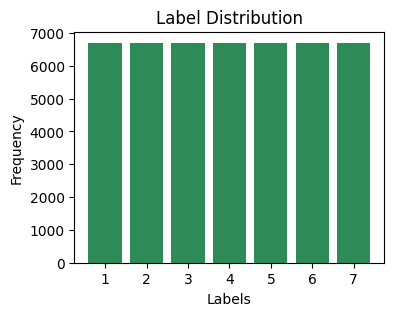

In [62]:
labels = [1, 2, 3, 4, 5, 6, 7]
frequencies = [6705, 6705, 6705, 6705, 6705, 6705, 6705]

# Create a bar chart
plt.figure(figsize=(4, 3))
plt.bar(labels, frequencies, color='seagreen')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.xticks(labels)  # Set the x-axis ticks to the labels
plt.show()

You can see all the Classes are balanced now the model will understand the patterns more efficient.

In [17]:
len(X),len(Y)

(46935, 46935)

In [20]:
#contains values except labels.
X

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,0.393132,0.484691,1.128056,0.345727,0.418782,1.059918,0.291630,0.281186,0.843041,0.345587,...,-0.432574,-0.090066,-0.372532,-0.147248,0.267226,0.359527,0.633046,0.417262,0.618551,0.938806
1,-2.658477,-2.612217,-2.275775,-2.280154,-2.250347,-1.661091,-1.469321,-1.445676,-0.701966,-0.828979,...,-1.900570,-2.645047,-2.605944,-2.193489,-2.806430,-2.698609,-2.383377,-2.348373,-2.283653,-2.043793
2,0.393132,0.150492,0.292760,0.449108,0.169331,0.385480,0.386817,-0.058524,0.188377,0.452365,...,-0.009114,-0.225729,-0.241155,-0.023980,-0.199658,-0.169324,0.108451,-0.429713,-0.417951,-0.254234
3,-2.420926,-2.500817,-2.275775,-1.721896,-1.975951,-1.730861,-0.993388,-1.162584,-0.885272,-0.481948,...,-2.154646,-3.006814,-2.947525,-2.661906,-2.806430,-2.744596,-2.623816,-2.348373,-2.325114,-2.282401
4,-0.228154,-0.406505,0.000407,0.325051,0.144386,0.641301,0.719970,0.507660,1.000161,0.959564,...,1.458882,0.723910,0.731037,1.011467,0.053238,0.083605,0.261457,-0.896414,-0.956932,-0.751333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46930,-3.115304,-2.924135,-2.902247,-3.686137,-3.447714,-3.405329,-4.372511,-4.050125,-3.975287,-4.993348,...,-3.792027,-3.979064,-3.604411,-3.524779,-3.273315,-3.020518,-2.973547,-2.780503,-2.573874,-2.580661
46931,-2.092010,-2.099779,-2.025186,-1.659867,-1.626719,-1.614578,-1.136168,-1.105966,-1.147138,-1.069231,...,-0.489035,-1.356251,-1.213346,-1.084081,-2.222825,-2.100778,-2.011789,-2.469369,-2.408034,-2.342053
46932,0.776867,0.908009,0.626879,0.779928,0.992520,0.734327,0.719970,0.819061,0.397870,0.719312,...,0.386116,0.769131,0.731037,0.444437,0.792472,0.796404,0.545613,0.832108,0.888041,0.640546
46933,-0.959078,-0.673864,-0.479889,-0.564027,-0.055175,0.083146,-0.303286,0.451042,0.554989,-0.215001,...,0.696654,-0.135287,0.415731,0.690972,-0.044030,0.474495,0.720478,-0.118580,0.286870,0.541126


In [22]:
#Contains only labels.
Y

0        2
1        2
2        2
3        2
4        2
        ..
46930    6
46931    6
46932    6
46933    6
46934    6
Name: label, Length: 46935, dtype: int64

In [23]:
X_reshaped = X.values.reshape(-1, 28, 28, 3)

In [32]:
X_reshaped

array([[[[ 0.39313206,  0.48469096,  1.12805637],
         [ 0.34572713,  0.41878227,  1.0599184 ],
         [ 0.29163011,  0.28118623,  0.84304118],
         ...,
         [ 0.25247344,  0.06220116,  0.08428503],
         [ 0.4485426 ,  0.46078727,  0.46073617],
         [ 0.49257988,  0.52775136,  0.50815862]],

        [[ 0.4475309 ,  0.64956374,  1.32963951],
         [ 0.43731323,  0.50351109,  1.19386291],
         [ 0.38052713,  0.4107981 ,  1.06129252],
         ...,
         [ 0.23087721,  0.07977056, -0.09464816],
         [ 0.43373158,  0.5197841 ,  0.49523955],
         [ 0.41282214,  0.5014221 ,  0.61933801]],

        [[ 0.40578375,  0.43496761,  1.12743148],
         [ 0.32938555,  0.29076917,  0.88272174],
         [ 0.35143777,  0.24659816,  1.01202141],
         ...,
         [ 0.18247994,  0.07641783, -0.07962827],
         [ 0.41567341,  0.55693557,  0.74425621],
         [ 0.4047914 ,  0.52147717,  0.7646944 ]],

        ...,

        [[ 0.43151836,  0.54610499,  1

# Applying the CNN Architecture

In [42]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#Fuly connected Layer
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, Y, test_size=0.2, random_state=42)

In [45]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1174/1174 [==============================] - 19s 15ms/step - loss: 0.7635 - accuracy: 0.7225 - val_loss: 0.4607 - val_accuracy: 0.8298
Epoch 2/10
1174/1174 [==============================] - 16s 14ms/step - loss: 0.3646 - accuracy: 0.8700 - val_loss: 0.3117 - val_accuracy: 0.8885
Epoch 3/10
1174/1174 [==============================] - 16s 14ms/step - loss: 0.2407 - accuracy: 0.9139 - val_loss: 0.2446 - val_accuracy: 0.9149
Epoch 4/10
1174/1174 [==============================] - 16s 14ms/step - loss: 0.1770 - accuracy: 0.9376 - val_loss: 0.1961 - val_accuracy: 0.9332
Epoch 5/10
1174/1174 [==============================] - 16s 14ms/step - loss: 0.1390 - accuracy: 0.9518 - val_loss: 0.1723 - val_accuracy: 0.9396
Epoch 6/10
1174/1174 [==============================] - 16s 14ms/step - loss: 0.1128 - accuracy: 0.9610 - val_loss: 0.1690 - val_accuracy: 0.9451
Epoch 7/10
1174/1174 [==============================] - 16s 14ms/step - loss: 0.0895 - accuracy: 0.9689 - val_loss: 0.1706 -

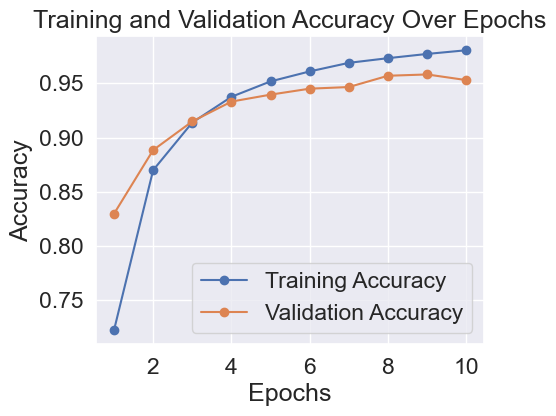

In [114]:
# Define the training accuracy and validation accuracy values
training_accuracy = [0.7225, 0.8700, 0.9139, 0.9376, 0.9518, 0.9610, 0.9689, 0.9732, 0.9771, 0.9805]
validation_accuracy = [0.8298, 0.8885, 0.9149, 0.9332, 0.9396, 0.9451, 0.9466, 0.9570, 0.9582, 0.9530]
epochs = range(1, 11)  
plt.figure(figsize=(5, 4)) 
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

## Displaying the Training Loss 

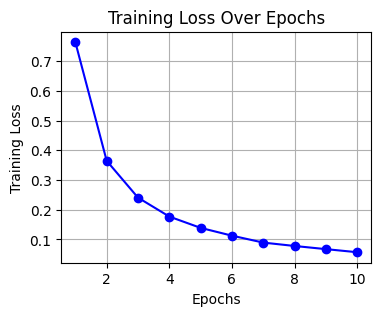

In [65]:
training_loss = [0.7635, 0.3646, 0.2407, 0.1770, 0.1390, 0.1128, 0.0895, 0.0781, 0.0675, 0.0571]

# Create an array of epoch numbers (1 to 10 in this case)
epochs = range(1, len(training_loss) + 1)

# Plot the training loss
plt.figure(figsize=(4, 3))
plt.plot(epochs, training_loss, 'bo-')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.grid(True)
plt.show()

In [115]:
np.random.seed(42)
model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

294/294 [==============================] - 2s 8ms/step - loss: 0.1752 - accuracy: 0.9530
Test Accuracy: 0.9530


# Evaluation on Different Metrices

## Confusion Matrix

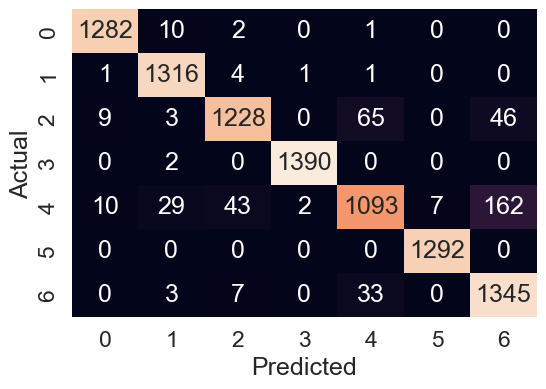

In [108]:
#Confusion Matrix
conf_matrix=confusion_matrix(y_test,y_pred_classes)
sns.set(font_scale=1.5)
# Function to plot confusion matrix
def plot_conf_mat(conf_matrix):
    plt.figure(figsize=(6,4))
    ax = sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='d')
    # Add labels
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plot_conf_mat(conf_matrix)
# Show the plot
plt.show()

## Accuracy, Precision, Recall, F1

In [103]:
np.random.seed(42)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score (assuming a multiclass classification problem)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

294/294 [==============================] - 2s 8ms/step
Accuracy: 0.9530
Precision: 0.9539
Recall: 0.9530
F1-Score: 0.9524


<Figure size 400x300 with 0 Axes>

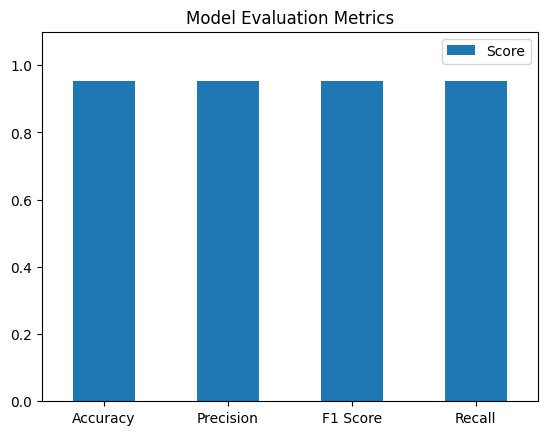

In [95]:
Metrics_dict={
              "Accuracy":0.9530,
              "Precision": 0.9539,
              "F1 Score":0.9530,
              "Recall":  0.9524 
}
model_compare = pd.DataFrame(Metrics_dict, index=["Score"])
# Create a bar plot
plt.figure(figsize=(4,3));
ax = model_compare.T.plot.bar();
plt.ylim(0, 1.1)  # Set the Y-axis range to 0-1
plt.title('Model Evaluation Metrics')
plt.xticks(rotation=0);# Rotate x-axis labels if needed
plt.show();

# Bonus Part

I have already balanced the Classes above which Improved the accuracy of the Model.As if you implement it, on the already given
Distribution it will give you accuracy of 66.6% but now it is giving approx 95.3% on test data.